<a href="https://www.kaggle.com/code/martynasdiugas/sales?scriptVersionId=282203785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sales Data Analysis — Business Insights Project

**Author:** Martynas Džiugas  
**Goal:** Explore a global sample sales dataset to uncover revenue trends and provide data-driven business recommendations.

---

### Key Business Questions

- Which product lines generate the most revenue?
- How do sales vary by deal size (Small, Medium, Large)?
- What seasonal sales patterns exist?
- Which countries drive the strongest performance?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')

BASE_COLOR = '#4C72B0' 
CURRENCY_FMT = mtick.StrMethodFormatter('{x:,.0f}')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Quality & Structure Check

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


We see 25 columns with 2,823 total orders. Some fields contain missing values (AddressLine2, State, etc.), but key sales fields are complete — so we can continue analysis without major cleaning.


In [3]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Sales per order ranges from `~$482` to `~$14,083`, with a mean of `~$3,554`.  
QuantityOrdered averages `~35 units` per order.  
These values confirm no obvious outliers preventing analysis.

In [4]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

No missing values in SALES or ORDERDATE — crucial for revenue and time-series analysis.  
Missing address/state/postal code fields won’t affect our business questions, so we keep all rows.


In [5]:
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

Classic Cars and Vintage Cars dominate the catalog — together ~56% of all orders.  
Trains are a niche product representing only ~3%.


In [6]:
df['COUNTRY'].value_counts().head(10)

COUNTRY
USA          1004
Spain         342
France        314
Australia     185
UK            144
Italy         113
Finland        92
Norway         85
Singapore      79
Canada         70
Name: count, dtype: int64

USA is by far the largest market (1,084 orders), followed by major European regions.  
Top 10 countries represent a majority of global sales.


In [7]:
df['DEALSIZE'].value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

Most orders are Small or Medium deals — Large deals represent ~5% of transactions.

We’ll check later whether they contribute disproportionately to revenue.

The dataset stores order dates as plain text, which prevents us from performing proper time-based analysis.

To enable monthly and seasonal sales trends, we convert the ORDERDATE column into a true datetime format.

In [8]:
print("Before conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

print("\nAfter conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

Before conversion:
0     2/24/2003 0:00
1      5/7/2003 0:00
2      7/1/2003 0:00
3     8/25/2003 0:00
4    10/10/2003 0:00
Name: ORDERDATE, dtype: object
object

After conversion:
0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]
datetime64[ns]


# Seasonal Revenue Patterns (Monthly Trend)

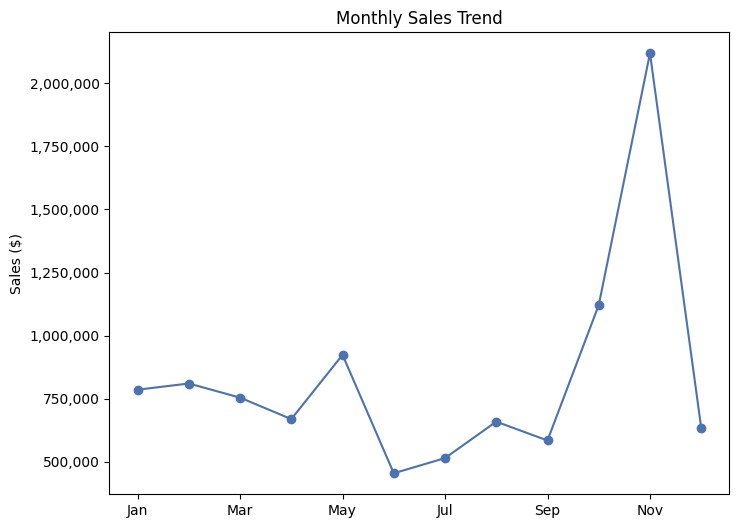

In [9]:
df['MONTH'] = df['ORDERDATE'].dt.month 
sales_by_month = df.groupby('MONTH')['SALES'].sum() 
sales_by_month.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
sales_by_month.plot(kind='line', marker='o', figsize=(8, 6), color=BASE_COLOR) 
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)') 

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT)

**Insight**
- Clear Q4 sales peak driven by holiday demand
- Mid-year (May–July) is the weakest period
- Strong opportunity to increase revenue via targeted promotions in lower months

# Year-Over-Year Revenue Performance

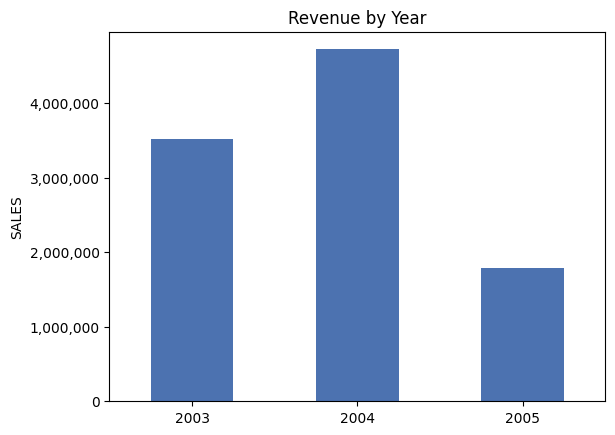

In [10]:
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum()
sales_by_year.plot(kind='bar', color=BASE_COLOR)
plt.title('Revenue by Year')
plt.xlabel('')
plt.ylabel('SALES')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT) 
plt.xticks(rotation=0);

**Insight** 
- Strong growth from 2003 → 2004
- Significant revenue decline in 2005
- Indicates potential market loss or supply issues needing review

# Revenue by Product Line

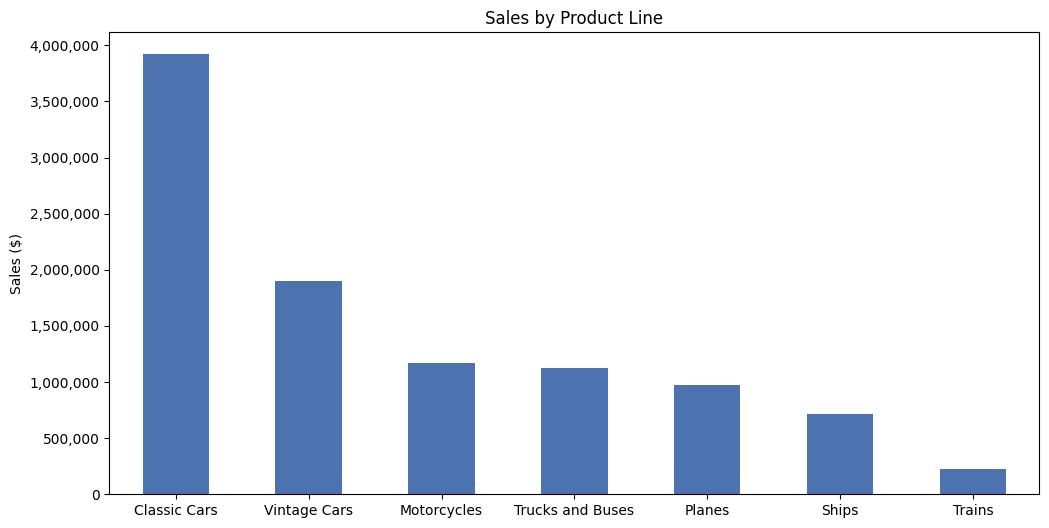

In [11]:
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sales_by_productline.plot(kind='bar', figsize=(12, 6), color=BASE_COLOR)
plt.title('Sales by Product Line')
plt.xlabel('')
plt.ylabel('Sales ($)')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT) 
plt.xticks(rotation=0);

**Insight** 
- Classic Cars are the top-selling product line by a wide margin.
- Vintage Cars follow but still trail significantly behind Classic Cars.
- Trains and Ships generate the lowest revenue.
- Focus on high-performing lines (Classic & Vintage Cars) could drive the most business value.

# Geographic Sales Distribution

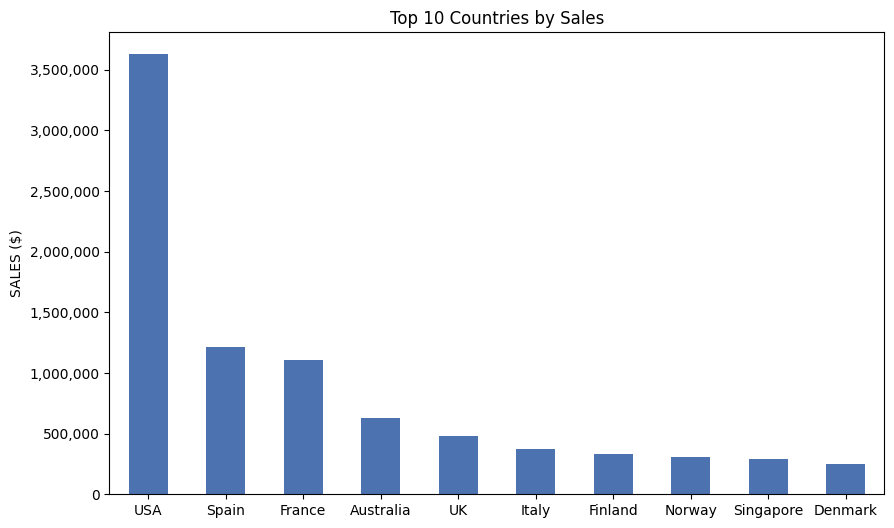

In [12]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
sales_by_country.plot(kind='bar', figsize=(10, 6), color=BASE_COLOR)
plt.title('Top 10 Countries by Sales')
plt.xlabel('')
plt.ylabel('SALES ($)')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT)
plt.xticks(rotation=0);

**Insight** 
- The USA is the dominant market, driving more than double the revenue of the next-largest country.
- Spain and France form the next major tier of markets.
- Remaining countries generate significantly smaller revenue shares, indicating strong regional concentration.
- Expanding presence in high-performing European countries could unlock further growth.

# Revenue Contribution by Deal Size

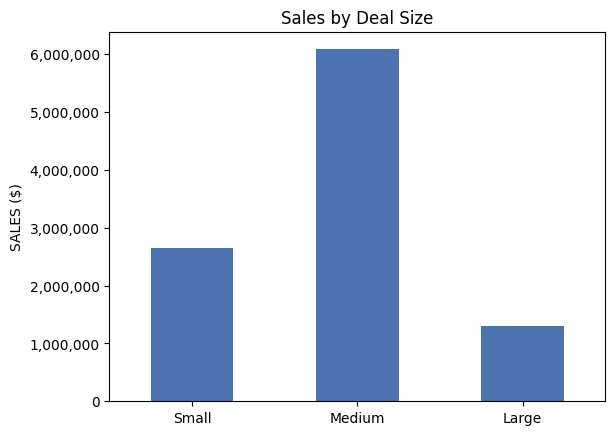

In [13]:
# Make DEALSIZE an ordered category
df['DEALSIZE'] = pd.Categorical(df['DEALSIZE'], 
                                categories=['Small', 'Medium', 'Large'],
                                ordered=True)

sales_by_dealsize = df.groupby('DEALSIZE', observed=True)['SALES'].sum()
sales_by_dealsize = sales_by_dealsize.loc[['Small', 'Medium', 'Large']]  # enforce order

sales_by_dealsize.plot(kind='bar', color=BASE_COLOR)
plt.title('Sales by Deal Size')
plt.xlabel('')
plt.ylabel('SALES ($)')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT)
plt.xticks(rotation=0);

**Insight** 
- Medium-sized orders drive the highest overall revenue, forming the core of the business.
- Small orders also contribute significantly, likely due to high transaction volume.
- Large deals, while valuable individually, occur infrequently and contribute the least revenue.

# Product Line Performance Over Time

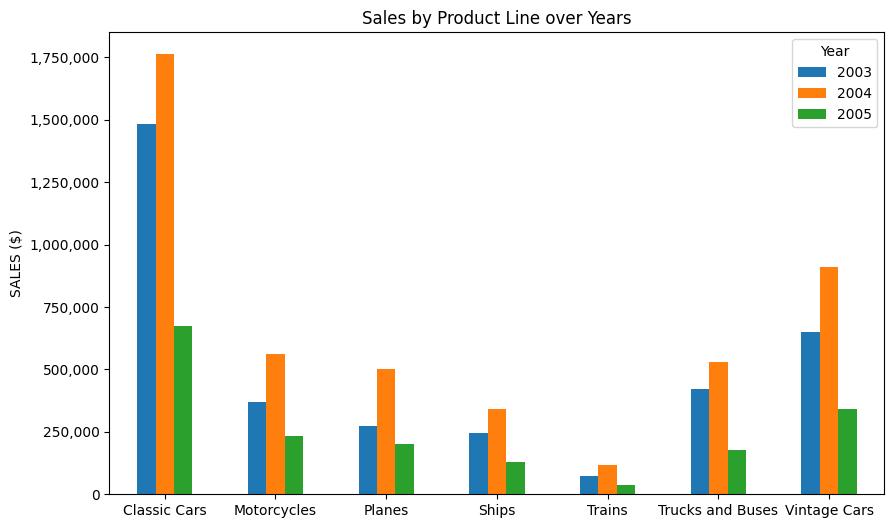

In [14]:
sales_product_year = df.groupby(['PRODUCTLINE','YEAR_ID'])['SALES'].sum().unstack()
sales_product_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Product Line over Years')
plt.xlabel('')
plt.ylabel('SALES ($)')
plt.legend(title='Year')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT)
plt.xticks(rotation=0);

**Insight** 
- Classic and Vintage Cars consistently generate the most revenue every year — clear flagship product lines.
- Most categories peak in 2004, indicating a strong growth year across the lineup.
- 2005 shows a sharp decline in every segment — possibly due to market slowdown, supply issues, or strategy changes.
- Trains remain niche with low and declining sales — a potential candidate for product reevaluation.

---

## Key Findings & Recommendations

### Overall Findings

**Demand over Time**
- Sales show clear **seasonality**: revenue is weakest in **May–July** and peaks strongly in **Q4**, especially in **November**.
- **2004** is the best-performing year across almost all product lines.
- **2005** shows a sharp drop in revenue across the board.

**Product Portfolio**
- **Classic Cars** are the dominant product line, followed by **Vintage Cars**. Together they drive the majority of revenue.
- Other lines (Motorcycles, Planes, Ships, Trucks and Buses) contribute moderate revenue.
- **Trains** are consistently the weakest segment and remain niche.

**Geography**
- The **USA** is by far the most important market, with more than double the revenue of the next-largest country.
- **Spain and France** form the next tier of strong markets.
- Remaining countries contribute much smaller shares of total sales.

**Deal Size**
- **Medium-sized deals** generate the highest total revenue and appear to be the “core” order type.
- **Small deals** also contribute significantly, likely via high volume.
- **Large deals** are relatively rare and deliver the smallest share of overall revenue.

---

### Recommended Actions

- **Double down on winning products**  
  Focus marketing, inventory planning, and promotions around **Classic Cars** and **Vintage Cars**, as they are the main revenue drivers.

- **Protect and grow key markets**  
  Prioritize the **USA**, **Spain**, and **France** for targeted campaigns and relationship management since they are the strongest markets.

- **Optimize around medium deals**  
  Since **Medium** deal sizes generate most revenue, refine pricing and discount structures around this band to maximize margin and conversion.

- **Investigate the 2005 decline**  
  The drop in 2005 appears across all product lines. This suggests a structural issue (e.g. supply constraints, pricing changes, or external market factors) and warrants deeper investigation.

- **Manage low-performing segments**  
  Consider whether niche lines like **Trains** should be repositioned, bundled with stronger products, or gradually phased out to reduce complexity.

- **Leverage seasonality**  
  Use the strong **Q4 spike** by ramping up inventory, staffing, and campaigns ahead of the peak season, while using **mid-year** promotions to smooth out the revenue dip.
